# **Data Preprocessing**

In [126]:
import pandas as pd
import numpy as np

In [127]:
data = pd.read_csv("Titanic-Dataset.csv")

In [128]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
data.shape

(891, 12)

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
colums_to_drop = ["PassengerId", "Name", "Ticket", "Cabin", "Embarked"]
data_clean = data.drop(colums_to_drop, axis=1)
data_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
le = LabelEncoder()
data_clean["Sex"] = le.fit_transform(data_clean["Sex"])
data_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [134]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [135]:
data_clean = data_clean.fillna(data_clean["Age"].mean())

In [136]:
data_clean.loc[2]

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [137]:
data_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [138]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
output_cols = ["Survived"]

x = data_clean[input_cols]
y = data_clean[output_cols]

print(x.shape, y.shape)
print(type(x))
print(type(y))

(891, 6) (891, 1)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# **Implementing Decission Tree**

In [139]:
#  ------------------NEW CODE------------------
def entropy(col):
    """Calculate entropy for a given column."""
    counts = np.unique(col, return_counts=True)[1]
    N = float(col.shape[0])
    ent = 0.0
    for ix in counts:
        p = ix / N
        ent += (-1.0 * p * np.log2(p))
    return ent

def divide_data(x_data, fkey, fval):
    """Divide data into left and right splits based on feature and split value."""
    x_left = x_data[x_data[fkey] <= fval]
    x_right = x_data[x_data[fkey] > fval]
    return x_left, x_right

def information_Gain(x_data, fkey, fval):
    """Calculate information gain for a given split."""
    left, right = divide_data(x_data, fkey, fval)
    l = float(left.shape[0]) / x_data.shape[0]
    r = float(right.shape[0]) / x_data.shape[0]
    
    # If either split is empty, return a large negative information gain
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -1000000

    # Calculate information gain
    i_gain = entropy(x_data['Survived']) - (l * entropy(left['Survived']) + r * entropy(right['Survived']))
    return i_gain

In [140]:
for fx in x.columns:
    print(fx)
    print(information_Gain(data_clean, fx, data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [141]:
#  ------------------NEW CODE------------------
class DecisionTree:
    # Constructor
    def __init__(self, depth=0, max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None

    def train(self, x_train):
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        info_gains = []

        for ix in features:
            i_gain = information_Gain(x_train, ix, x_train[ix].mean())
            info_gains.append(i_gain)

        # Selecting the best feature
        self.fkey = features[np.argmax(info_gains)]
        self.fval = x_train[self.fkey].mean()
        print("Splitting on feature:", self.fkey)

        # Split Data
        data_left, data_right = divide_data(x_train, self.fkey, self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)

        # Stopping conditions
        if data_left.shape[0] == 0 or data_right.shape[0] == 0 or self.depth >= self.max_depth:
            if x_train['Survived'].mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return

        # Recursive case
        self.left = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.left.train(data_left)

        self.right = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.right.train(data_right)

        # Setting the target at this node based on majority class
        if x_train['Survived'].mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = "Dead"

    def predict(self, test):
        if test[self.fkey] > self.fval:
            # Go to the right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            # Go to the left
            if self.left is None:
                return self.target
            return self.left.predict(test)


In [142]:
d = DecisionTree()
d.train(data_clean)

Splitting on feature: Sex
Splitting on feature: Pclass
Splitting on feature: Pclass
Splitting on feature: Parch
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Parch
Splitting on feature: Age
Splitting on feature: Fare
Splitting on feature: Parch
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Fare
Splitting on feature: SibSp
Splitting on feature: Fare
Splitting on feature: Fare
Splitting on feature: Age
Splitting on feature: SibSp
Splitting on feature: Parch
Splitting on feature: Age
Splitting on feature: SibSp
Splitting on feature: Fare
Splitting on feature: Parch
Splitting on feature: Parch
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Fare
Splitting on feature: Parch
Splitting on feature: Pclass
Splitting on feature: Pclass
Splitting on feature: Age


In [143]:
# Train  Validation - Test Set Split
split = int(0.7 * data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [144]:
print(train_data.shape, test_data.shape)

(623, 7) (268, 7)


In [145]:
dt = DecisionTree()
dt.train(train_data)

Splitting on feature: Sex
Splitting on feature: Pclass
Splitting on feature: Age
Splitting on feature: SibSp
Splitting on feature: Pclass
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: SibSp
Splitting on feature: Parch
Splitting on feature: Pclass
Splitting on feature: SibSp
Splitting on feature: Fare
Splitting on feature: Parch
Splitting on feature: Age
Splitting on feature: Pclass
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Parch
Splitting on feature: SibSp
Splitting on feature: Fare
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Fare
Splitting on feature: Age
Splitting on feature: Age
Splitting on feature: Fare
Splitting on feature: Age
Splitting on feature: Parch
Splitting on feature: Fare
Splitting on feature: Fare
Splitting on feature: Fare
Splitting on feature: Age
Splitting on feature: Fare
Splitting on feature: Parch
Splitting on feature: Fare
Splitting on feature: Age
Splitting on feature: Age

In [146]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [147]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [148]:
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'De

In [149]:
y_actual = test_data[output_cols]
print(y_actual)

     Survived
0           0
1           0
2           0
3           0
4           1
..        ...
263         0
264         1
265         0
266         1
267         0

[268 rows x 1 columns]


In [150]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [151]:
y_pred = np.array(y_pred).reshape((-1, 1))
print(y_pred.shape)

(268, 1)


In [152]:
acc = np.sum(y_pred == y_actual) / y_pred.shape[0]

c:\Users\piyus\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [153]:
acc = np.sum(np.array(y_pred) == np.array(y_actual)) / y_pred.shape[0]

In [154]:
print(acc)

0.8171641791044776


# **Decision Tree using Sklearn**

In [155]:
from sklearn.tree import DecisionTreeClassifier

sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
sk_tree.fit(train_data[input_cols], train_data[output_cols])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [156]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0])

In [157]:
sk_tree.score(test_data[input_cols], test_data[output_cols])

0.8283582089552238

# **Visualise a DecisionTree**

In [158]:
import pydotplus
#from sklearn.externals.six import StringIO
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [159]:
dot_data = StringIO()
export_graphviz(sk_tree, out_file=dot_data, filled=True, rounded=True)

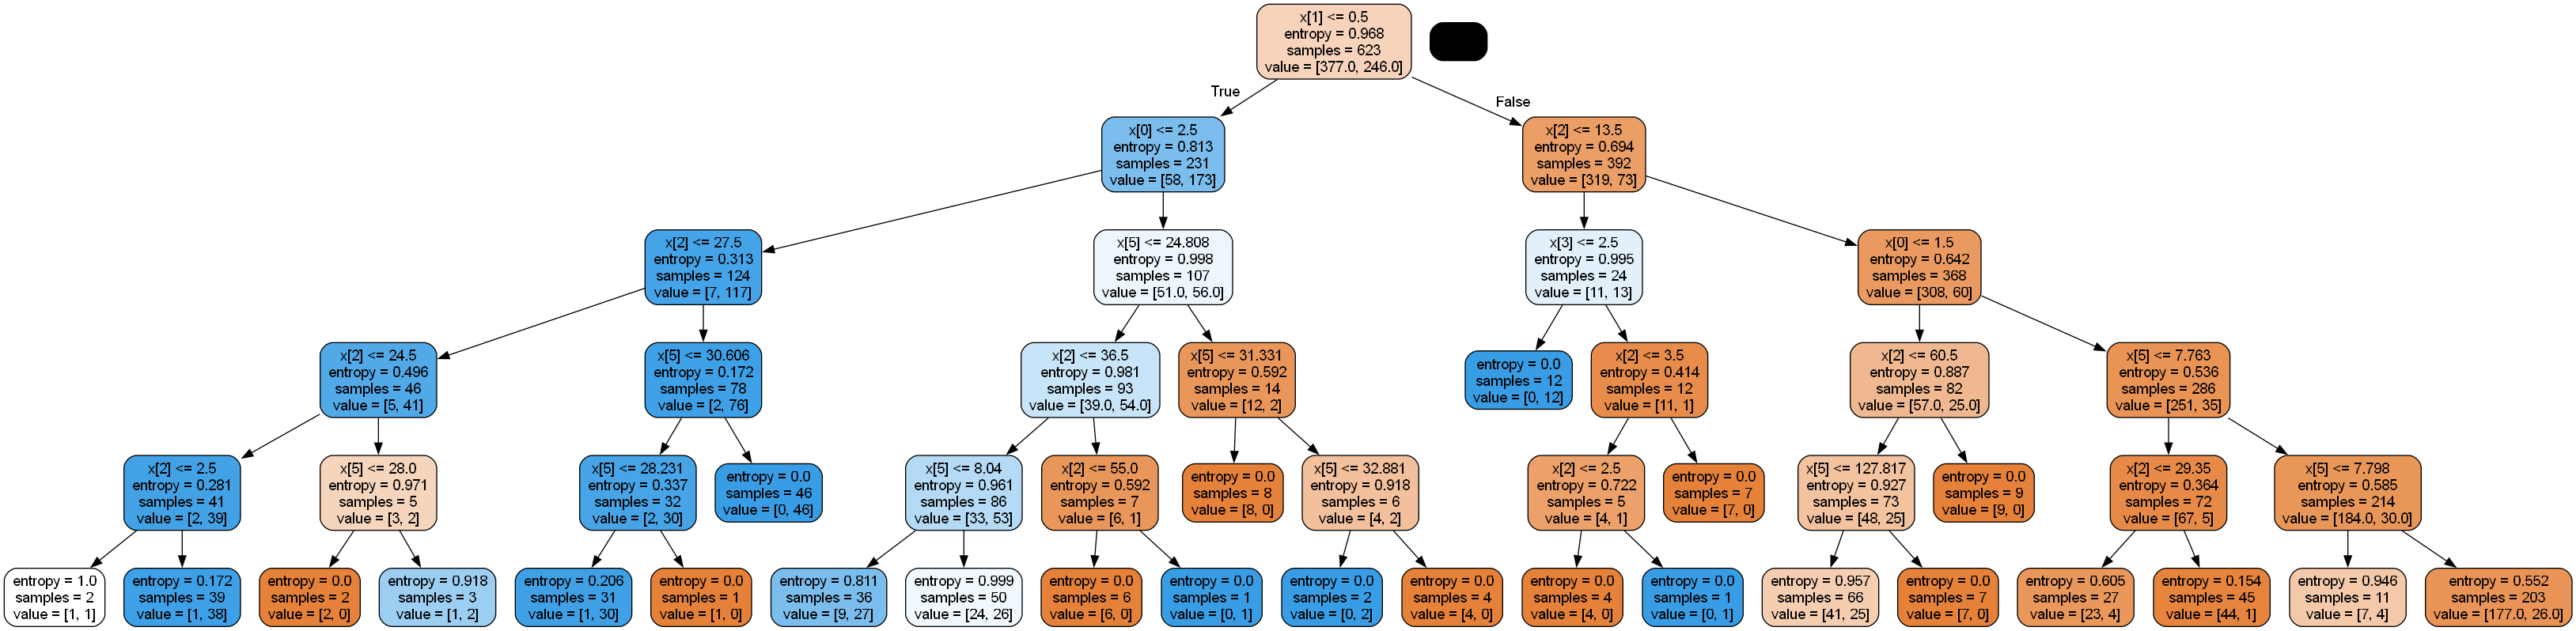

In [160]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# **Random Forest**

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [162]:
X_train = np.array(train_data[input_cols])
y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = np.array(test_data[input_cols])
y_test = np.array(test_data[output_cols]).reshape((-1,))
model = RandomForestClassifier(n_estimators=10,max_depth=5,criterion='entropy')
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [163]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.8246268656716418

In [164]:
acc = cross_val_score(model,X_train,y_train,cv=5).mean()
print(acc*100)

82.02064516129033


In [165]:
accuracy_list = []
for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5,criterion='entropy'),X_train,y_train,cv=5).mean()
    accuracy_list.append(acc)

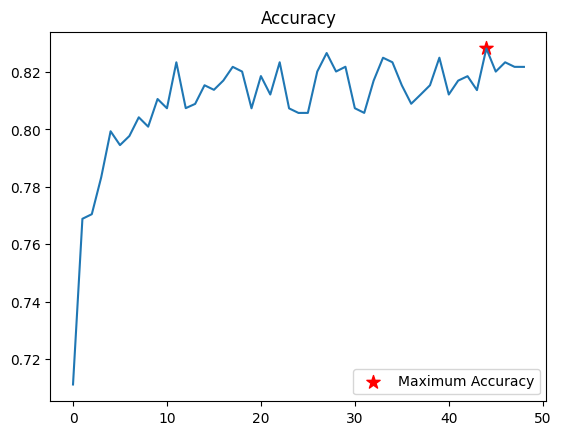

In [166]:
import matplotlib.pyplot as plt

plt.plot(accuracy_list)
plt.title("Accuracy")
plt.scatter(np.argmax(accuracy_list),np.max(accuracy_list),marker="*",c='red',s=100,label="Maximum Accuracy")
plt.legend()
plt.show()